In [1]:
import os
import json
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns

import matplotlib.cm as cm
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# 1 Load data

### 1.1 msoa census

In [2]:
path = os.getcwd()
msoa  = pd.read_csv(path + '/MSOA_tidy.csv',encoding = 'gb2312')

In [3]:
msoa

,MSOA_Code,MSOA_Name,0_15(%),16_29(%),30_44(%),45_64(%),65+(%),Density,Couple_household_1(%),Couple_household_2(%),...,Median_Income,Economically_active(%),Income_Deprivation,No_cars_household (%),no_ limited(%),health(%),obesity(16+),Cancer_Incidence,Life_Expectancy(M),Life_Expectancy(F）
0,E02000001,City of London 001,8.41,22.58,27.73,27.25,14.03,26.2,7.0,21.1,...,46788.0,78.8,9.9,69.4,88.5,55.8,13.7,76.8,83.6,88.4
1,E02000002,Barking and Dagenham 001,25.85,18.85,20.49,18.57,16.25,31.7,18.1,13.5,...,27059.0,65.3,27.5,37.6,79.6,43.3,29.8,100.7,78.0,80.1
2,E02000003,Barking and Dagenham 002,22.37,19.50,22.90,22.49,12.74,47.7,20.2,19.0,...,36835.0,70.5,21.2,31.2,84.1,45.5,28.3,91.4,80.2,85.6
3,E02000004,Barking and Dagenham 003,19.35,20.66,18.67,24.96,16.37,25.3,21.9,22.6,...,39668.0,71.8,21.3,24.0,81.7,46.2,26.9,96.1,77.9,80.7
4,E02000005,Barking and Dagenham 004,25.69,18.59,23.30,21.36,11.05,72.9,21.7,18.3,...,29156.0,68.3,25.3,33.9,83.2,47.8,29.7,110.0,76.8,79.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,E02000980,Westminster 021,14.71,22.41,26.68,22.95,13.25,201.5,10.1,17.5,...,36808.0,71.2,27.4,67.1,83.5,50.8,16.7,87.6,79.7,85.0
980,E02000981,Westminster 022,10.15,27.53,30.93,21.90,9.49,250.5,7.9,21.6,...,51738.0,77.5,18.4,60.8,88.4,57.8,12.5,76.9,83.2,86.9
981,E02000982,Westminster 023,17.58,20.53,26.19,22.31,13.40,131.3,10.7,15.6,...,34920.0,69.4,20.5,64.8,83.2,50.5,17.7,89.9,82.2,92.8
982,E02000983,Westminster 024,14.90,20.74,27.27,21.75,15.34,229.2,9.1,15.8,...,35968.0,70.9,17.4,65.5,82.4,49.3,15.0,72.8,84.3,86.5


In [4]:
print(msoa.shape)

(984, 27)


### 1.2 covid death

In [5]:
covid = pd.read_csv(path + '/covid_19_death.csv',low_memory=False)
covid.head()

,MSOA code,Total_Death
0,E02000001,11.0
1,E02000002,42.0
2,E02000003,25.0
3,E02000004,24.0
4,E02000005,22.0


# 2 tidy data 

###　2.1 merge data 

In [6]:
msoa_covid = pd.merge(msoa, covid, left_on='MSOA_Code', right_on='MSOA code', how='inner')
print(msoa_covid.shape)
msoa_covid

(984, 29)


,MSOA_Code,MSOA_Name,0_15(%),16_29(%),30_44(%),45_64(%),65+(%),Density,Couple_household_1(%),Couple_household_2(%),...,Income_Deprivation,No_cars_household (%),no_ limited(%),health(%),obesity(16+),Cancer_Incidence,Life_Expectancy(M),Life_Expectancy(F）,MSOA code,Total_Death
0,E02000001,City of London 001,8.41,22.58,27.73,27.25,14.03,26.2,7.0,21.1,...,9.9,69.4,88.5,55.8,13.7,76.8,83.6,88.4,E02000001,11.0
1,E02000002,Barking and Dagenham 001,25.85,18.85,20.49,18.57,16.25,31.7,18.1,13.5,...,27.5,37.6,79.6,43.3,29.8,100.7,78.0,80.1,E02000002,42.0
2,E02000003,Barking and Dagenham 002,22.37,19.50,22.90,22.49,12.74,47.7,20.2,19.0,...,21.2,31.2,84.1,45.5,28.3,91.4,80.2,85.6,E02000003,25.0
3,E02000004,Barking and Dagenham 003,19.35,20.66,18.67,24.96,16.37,25.3,21.9,22.6,...,21.3,24.0,81.7,46.2,26.9,96.1,77.9,80.7,E02000004,24.0
4,E02000005,Barking and Dagenham 004,25.69,18.59,23.30,21.36,11.05,72.9,21.7,18.3,...,25.3,33.9,83.2,47.8,29.7,110.0,76.8,79.9,E02000005,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,E02000980,Westminster 021,14.71,22.41,26.68,22.95,13.25,201.5,10.1,17.5,...,27.4,67.1,83.5,50.8,16.7,87.6,79.7,85.0,E02000980,15.0
980,E02000981,Westminster 022,10.15,27.53,30.93,21.90,9.49,250.5,7.9,21.6,...,18.4,60.8,88.4,57.8,12.5,76.9,83.2,86.9,E02000981,5.0
981,E02000982,Westminster 023,17.58,20.53,26.19,22.31,13.40,131.3,10.7,15.6,...,20.5,64.8,83.2,50.5,17.7,89.9,82.2,92.8,E02000982,21.0
982,E02000983,Westminster 024,14.90,20.74,27.27,21.75,15.34,229.2,9.1,15.8,...,17.4,65.5,82.4,49.3,15.0,72.8,84.3,86.5,E02000983,11.0


###　2.2 drop NaN

In [7]:
msoa_covid.drop(msoa_covid[msoa_covid.MSOA_Code.isna()].index.values, axis=0, inplace=True)
print(msoa_covid.shape) 

(983, 29)


In [8]:
msoa_covid.drop(msoa_covid[msoa_covid.Total_Death.isna()].index.values, axis=0, inplace=True)
print(msoa_covid.shape) 

(983, 29)


### 2.3 data distribution 

### （1）log data

In [9]:
msoa_covid1 = msoa_covid
msoa_covid1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983 entries, 0 to 982
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MSOA_Code                 983 non-null    object 
 1   MSOA_Name                 983 non-null    object 
 2   0_15(%)                   983 non-null    float64
 3   16_29(%)                  983 non-null    float64
 4   30_44(%)                  983 non-null    float64
 5   45_64(%)                  983 non-null    float64
 6   65+(%)                    983 non-null    float64
 7   Density                   983 non-null    float64
 8   Couple_household_1(%)     983 non-null    float64
 9   Couple_household_2(%)     983 non-null    float64
 10  Lone_parent_household(%)  983 non-null    float64
 11  One_person_household(%)   983 non-null    float64
 12  White(%)                  983 non-null    float64
 13  Asian(%)                  983 non-null    float64
 14  Black(%)  

In [10]:
import numpy as np
msoa_covid1['lntotal'] = np.log(msoa_covid1.Total_Death)
msoa_covid1

,MSOA_Code,MSOA_Name,0_15(%),16_29(%),30_44(%),45_64(%),65+(%),Density,Couple_household_1(%),Couple_household_2(%),...,No_cars_household (%),no_ limited(%),health(%),obesity(16+),Cancer_Incidence,Life_Expectancy(M),Life_Expectancy(F）,MSOA code,Total_Death,lntotal
0,E02000001,City of London 001,8.41,22.58,27.73,27.25,14.03,26.2,7.0,21.1,...,69.4,88.5,55.8,13.7,76.8,83.6,88.4,E02000001,11.0,2.397895
1,E02000002,Barking and Dagenham 001,25.85,18.85,20.49,18.57,16.25,31.7,18.1,13.5,...,37.6,79.6,43.3,29.8,100.7,78.0,80.1,E02000002,42.0,3.737670
2,E02000003,Barking and Dagenham 002,22.37,19.50,22.90,22.49,12.74,47.7,20.2,19.0,...,31.2,84.1,45.5,28.3,91.4,80.2,85.6,E02000003,25.0,3.218876
3,E02000004,Barking and Dagenham 003,19.35,20.66,18.67,24.96,16.37,25.3,21.9,22.6,...,24.0,81.7,46.2,26.9,96.1,77.9,80.7,E02000004,24.0,3.178054
4,E02000005,Barking and Dagenham 004,25.69,18.59,23.30,21.36,11.05,72.9,21.7,18.3,...,33.9,83.2,47.8,29.7,110.0,76.8,79.9,E02000005,22.0,3.091042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,E02000979,Westminster 020,12.72,24.60,26.38,24.37,11.93,60.2,9.9,21.1,...,61.5,86.8,54.2,15.7,68.8,83.3,92.2,E02000979,18.0,2.890372
979,E02000980,Westminster 021,14.71,22.41,26.68,22.95,13.25,201.5,10.1,17.5,...,67.1,83.5,50.8,16.7,87.6,79.7,85.0,E02000980,15.0,2.708050
980,E02000981,Westminster 022,10.15,27.53,30.93,21.90,9.49,250.5,7.9,21.6,...,60.8,88.4,57.8,12.5,76.9,83.2,86.9,E02000981,5.0,1.609438
981,E02000982,Westminster 023,17.58,20.53,26.19,22.31,13.40,131.3,10.7,15.6,...,64.8,83.2,50.5,17.7,89.9,82.2,92.8,E02000982,21.0,3.044522


In [11]:
msoa_covid.Total_Death.describe()

count    983.000000
mean      17.878942
std        8.914084
min        1.000000
25%       12.000000
50%       16.000000
75%       23.000000
max       56.000000
Name: Total_Death, dtype: float64

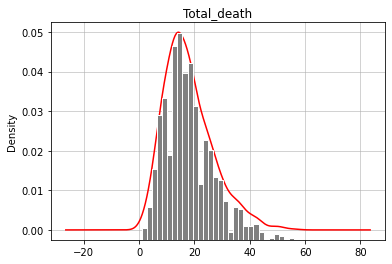

In [12]:
ax1 = msoa_covid.Total_Death.plot.kde(c='r')
ax2= ax1.twinx()
ax2 = msoa_covid.Total_Death.plot.hist(bins = 30,color='grey',edgecolor = "white")
ax2.axis('off')
ax1.grid(True,alpha=0.7)
plt.title('Total_death')
plt.savefig(os.path.join('img','1.png'))


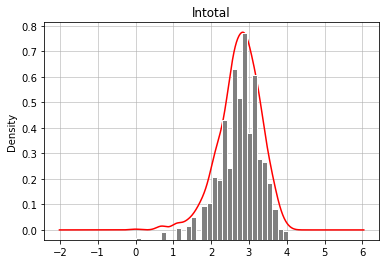

In [13]:
ax1 = msoa_covid.lntotal.plot.kde(c='r')
ax2= ax1.twinx()
ax2 = msoa_covid.lntotal.plot.hist(bins = 30,color='grey', edgecolor = "white" )
ax2.axis('off')
ax1.grid(True,alpha=0.7)
plt.title('lntotal')
plt.savefig(os.path.join('img','2.png'))

### （2） covid death distribution in London

In [14]:
#read london borough
boros = gpd.read_file('https://github.com/yinwenzhu11/i2p/blob/main/data/geo/Boroughs.gpkg?raw=true')

/opt/conda/envs/sds2021/lib/python3.9/site-packages/geopandas/geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


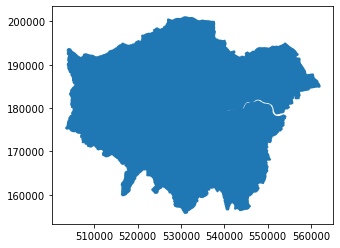

In [15]:
ldn = gpd.GeoDataFrame(gpd.GeoSeries(data=boros.unary_union, crs='epsg:27700')).rename(columns={0:'original'})
# buffer the boundary by 250m
ldn['geometry'] = ldn.original.buffer(250)
ldn = ldn.set_geometry('geometry')
ldn.plot();

<AxesSubplot:>

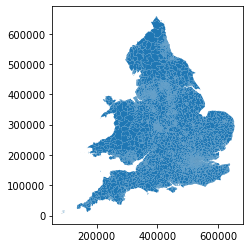

In [16]:
#MSOA Shapefile 
msoas = gpd.read_file('https://github.com/yinwenzhu11/i2p/blob/main/data/raw/MSOA_EngWal_Dec_2011_Generalised_ClippedEW_0%20(1).zip?raw=true')
msoas.plot()

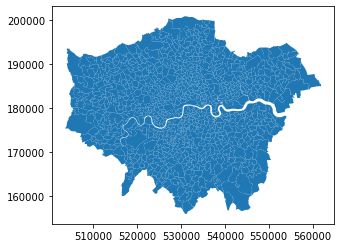

In [17]:
ldn_msoas = gpd.sjoin(msoas, ldn, op='within')
ldn_msoas.plot();

In [18]:
print(ldn_msoas.columns.values)
ldn_msoas.sample(3, random_state=42)

['objectid' 'msoa11cd' 'msoa11nm' 'msoa11nmw' 'st_areasha' 'st_lengths'
 'geometry' 'index_right' 'original']


,objectid,msoa11cd,msoa11nm,msoa11nmw,st_areasha,st_lengths,geometry,index_right,original
810,811,E02000841,Sutton 002,Sutton 002,1.157948e+06,6071.904824,"POLYGON ((526810.939 166761.883, 526817.193 16...",0,"POLYGON ((534747.800 159517.800, 534588.000 15..."
801,802,E02000832,Southwark 026,Southwark 026,8.445931e+05,7259.736762,"POLYGON ((535383.983 176270.452, 535481.686 17...",0,"POLYGON ((534747.800 159517.800, 534588.000 15..."
813,814,E02000844,Sutton 005,Sutton 005,1.013622e+06,8251.762791,"POLYGON ((527331.317 166648.264, 527346.896 16...",0,"POLYGON ((534747.800 159517.800, 534588.000 15..."


In [19]:
# menge add census and shp
msoa_gdf =  pd.merge(ldn_msoas, msoa_covid1,left_on="msoa11cd", right_on="MSOA_Code", how='left')
msoa_gdf.head(3)
print(msoa_gdf.shape)

(983, 39)


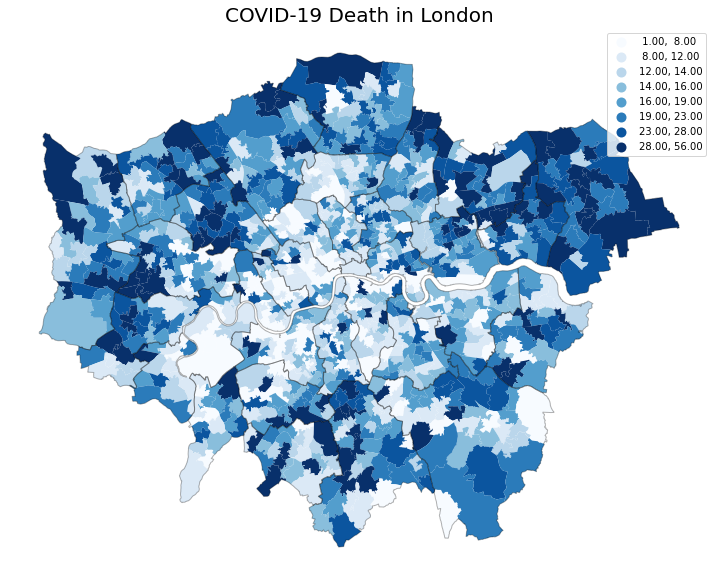

In [20]:
ax=msoa_gdf.plot(column='Total_Death', scheme='quantiles',k=8,legend=True,figsize=(16,10),cmap='Blues',edgecolor='None')
plt.axis('off')
plt.title('COVID-19 Death in London',fontsize= 20)
boros.plot(ax=ax, edgecolor='k', facecolor='None', alpha=0.3)
# save figure 
plt.savefig(os.path.join('img','COVID-19 Death in London1.png'))

#　3 relation matrix

<AxesSubplot:>

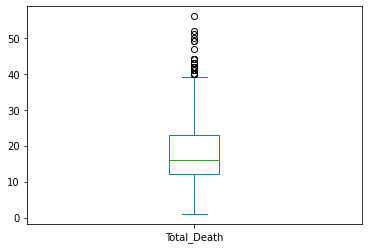

In [21]:
msoa_covid.Total_Death.plot.box() # boxplot

In [22]:
#msoa_covid.drop(msoa_covid[msoa_covid.Total_Death>38].index.values, axis=0, inplace=True)
#print(msoa_covid.shape) 

In [23]:
#msoa_covid.Total_Death.plot.box() # boxplot

In [24]:
msoa_covid1.drop(["Total_Death"],axis=1, inplace=True)

In [25]:
corr = msoa_covid1.corr()
corr

,0_15(%),16_29(%),30_44(%),45_64(%),65+(%),Density,Couple_household_1(%),Couple_household_2(%),Lone_parent_household(%),One_person_household(%),...,Economically_active(%),Income_Deprivation,No_cars_household (%),no_ limited(%),health(%),obesity(16+),Cancer_Incidence,Life_Expectancy(M),Life_Expectancy(F）,lntotal
0_15(%),1.000000,-0.323902,-0.368203,-0.014696,-0.150013,-0.140592,0.543900,-0.464729,0.715467,-0.498947,...,-0.459496,0.219567,-0.141747,-0.343143,-0.438987,0.646356,0.042810,-0.296012,-0.279853,0.280093
16_29(%),-0.323902,1.000000,0.395051,-0.809905,-0.695761,0.589448,-0.635860,-0.427618,0.031046,0.307691,...,-0.116543,0.658800,0.727135,0.217644,0.137857,-0.143186,0.171086,-0.316339,-0.207284,-0.188274
30_44(%),-0.368203,0.395051,1.000000,-0.614513,-0.640676,0.496584,-0.539392,-0.075674,-0.207741,0.534132,...,0.555285,0.290870,0.555455,0.551863,0.551600,-0.486600,0.173529,-0.117078,-0.007758,-0.466732
45_64(%),-0.014696,-0.809905,-0.614513,1.000000,0.819070,-0.617115,0.516640,0.584990,-0.208777,-0.305245,...,0.071323,-0.743202,-0.762558,-0.216944,-0.161693,0.091399,-0.237548,0.435937,0.305679,0.193781
65+(%),-0.150013,-0.695761,-0.640676,0.819070,1.000000,-0.603997,0.406548,0.572749,-0.338990,-0.195348,...,-0.033666,-0.721844,-0.715263,-0.331230,-0.177472,-0.023901,-0.233596,0.437268,0.280311,0.286161
Density,-0.140592,0.589448,0.496584,-0.617115,-0.603997,1.000000,-0.542526,-0.469268,0.083115,0.388905,...,-0.057549,0.630083,0.764696,0.117892,0.189765,-0.152546,0.114907,-0.247907,-0.115322,-0.189029
Couple_household_1(%),0.543900,-0.635860,-0.539392,0.516640,0.406548,-0.542526,1.000000,0.344676,-0.054608,-0.797244,...,-0.072728,-0.470004,-0.808441,-0.010129,-0.153185,0.195976,-0.244912,0.232843,0.096796,0.236878
Couple_household_2(%),-0.464729,-0.427618,-0.075674,0.584990,0.572749,-0.469268,0.344676,1.000000,-0.711167,-0.191419,...,0.569462,-0.759110,-0.679629,0.337711,0.348372,-0.387781,-0.158667,0.501745,0.369111,-0.142270
Lone_parent_household(%),0.715467,0.031046,-0.207741,-0.208777,-0.338990,0.083115,-0.054608,-0.711167,1.000000,-0.143473,...,-0.492844,0.499816,0.270394,-0.549635,-0.612732,0.761923,0.221495,-0.525793,-0.430096,0.249469
One_person_household(%),-0.498947,0.307691,0.534132,-0.305245,-0.195348,0.388905,-0.797244,-0.191419,-0.143473,1.000000,...,0.122863,0.182845,0.634162,0.085310,0.339881,-0.348591,0.193278,-0.036778,0.071100,-0.302197


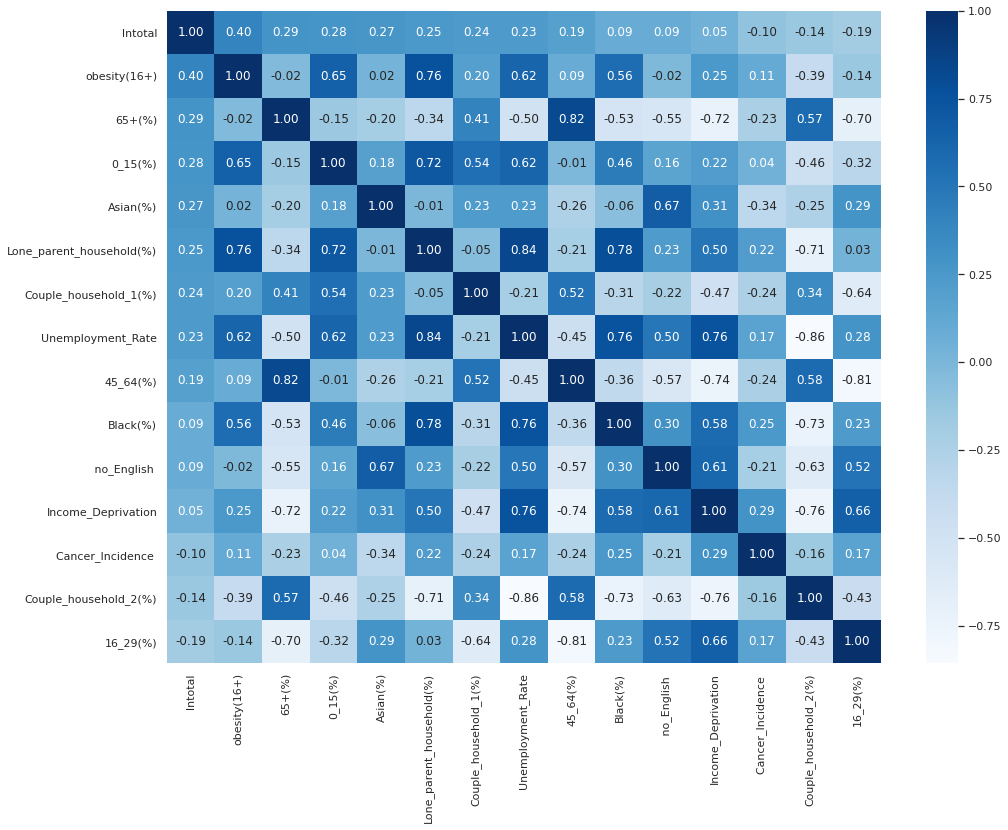

In [26]:
k=15
cols = corr.nlargest(k, 'lntotal')['lntotal'].index
heat = np.corrcoef(msoa_covid1[cols].values.T)
sns.set(font_scale=1.0)
plt.subplots(figsize=(16, 12))
hm = sns.heatmap(heat, cbar=True, annot=True, square=False, fmt='.2f', annot_kws={'size': 12}, cmap = "Blues", yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# 4 regression analysis

In [27]:
msoa_covid1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983 entries, 0 to 982
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MSOA_Code                 983 non-null    object 
 1   MSOA_Name                 983 non-null    object 
 2   0_15(%)                   983 non-null    float64
 3   16_29(%)                  983 non-null    float64
 4   30_44(%)                  983 non-null    float64
 5   45_64(%)                  983 non-null    float64
 6   65+(%)                    983 non-null    float64
 7   Density                   983 non-null    float64
 8   Couple_household_1(%)     983 non-null    float64
 9   Couple_household_2(%)     983 non-null    float64
 10  Lone_parent_household(%)  983 non-null    float64
 11  One_person_household(%)   983 non-null    float64
 12  White(%)                  983 non-null    float64
 13  Asian(%)                  983 non-null    float64
 14  Black(%)  

In [28]:
msoa_covid1.drop(["MSOA code","MSOA_Code","MSOA_Name"],axis=1, inplace=True)

In [29]:
msoa_covid1 = pd.get_dummies(msoa_covid1)

In [30]:
msoa_covid1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983 entries, 0 to 982
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   0_15(%)                   983 non-null    float64
 1   16_29(%)                  983 non-null    float64
 2   30_44(%)                  983 non-null    float64
 3   45_64(%)                  983 non-null    float64
 4   65+(%)                    983 non-null    float64
 5   Density                   983 non-null    float64
 6   Couple_household_1(%)     983 non-null    float64
 7   Couple_household_2(%)     983 non-null    float64
 8   Lone_parent_household(%)  983 non-null    float64
 9   One_person_household(%)   983 non-null    float64
 10  White(%)                  983 non-null    float64
 11  Asian(%)                  983 non-null    float64
 12  Black(%)                  983 non-null    float64
 13   no_English               983 non-null    float64
 14  Unemployme

In [31]:
### VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):

    while True:

        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        vif_df = vif_df.drop('const')
        

        if vif_df.VIF.max() > thresh:
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            break

    return df

In [32]:
mosa_covid_new = drop_column_using_vif_(msoa_covid1.drop('lntotal', axis=1))

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Dropping: 16_29(%)
Dropping: White(%)
Dropping: Couple_household_1(%)
Dropping: No_cars_household (%)
Dropping: Unemployment_Rate
Dropping: 65+(%)
Dropping: Couple_household_2(%)
Dropping: health(%)
Dropping: Lone_parent_household(%)
Dropping: 30_44(%)
Dropping: Income_Deprivation
Dropping: Median_Income 


In [33]:
regression = sm.OLS(endog=msoa_covid1[['lntotal']],exog=sm.add_constant(mosa_covid_new)).fit()
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lntotal   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     54.11
Date:                Tue, 18 Jan 2022   Prob (F-statistic):          2.68e-105
Time:                        13:11:12   Log-Likelihood:                -531.62
No. Observations:                 983   AIC:                             1091.
Df Residuals:                     969   BIC:                             1160.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      12.7519      0.930     13.719      0.000      10.928      14.576
0_15(%)                    -0.0033      0.005     -0.619      0.536      -0.014       0.007
45_64(%)                    0.0257      0.006      4.274      0.000       0.014       0.037
Density                    -0.0009      0.000     -2.304      0.021      -0.002      -0.000
One_person_household(%)    -0.0037      0.003     -1.175      0.240      -0.010       0.002
Asian(%)                    0.0070      0.002      4.226      0.000       0.004       0.010
Black(%)                   -0.0011      0.002     -0.489      0.625      -0.005       0.003
 no_English                 0.0064      0.003      2.081      0.038       0.000       0.012
Economically_active(%)      0.0081      0.004      1.834      0.067      -0.001       0.017
no_ limited(%)             -0.0816      0.009     -9.522      0.000      -0.098      -0.065
obesity(16+)                0.0099      0.005      2.030      0.043       0.000       0.019
Cancer_Incidence           -0.0045      0.001     -3.096      0.002      -0.007      -0.002
Life_Expectancy(M)         -0.0053      0.007     -0.808      0.419      -0.018       0.008
Life_Expectancy(F）         -0.0412      0.007     -6.280      0.000      -0.054      -0.028
==============================================================================
Omnibus:                      124.997   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              307.943
Skew:                          -0.695   Prob(JB):                     1.35e-67
Kurtosis:                       5.363   Cond. No.                     1.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

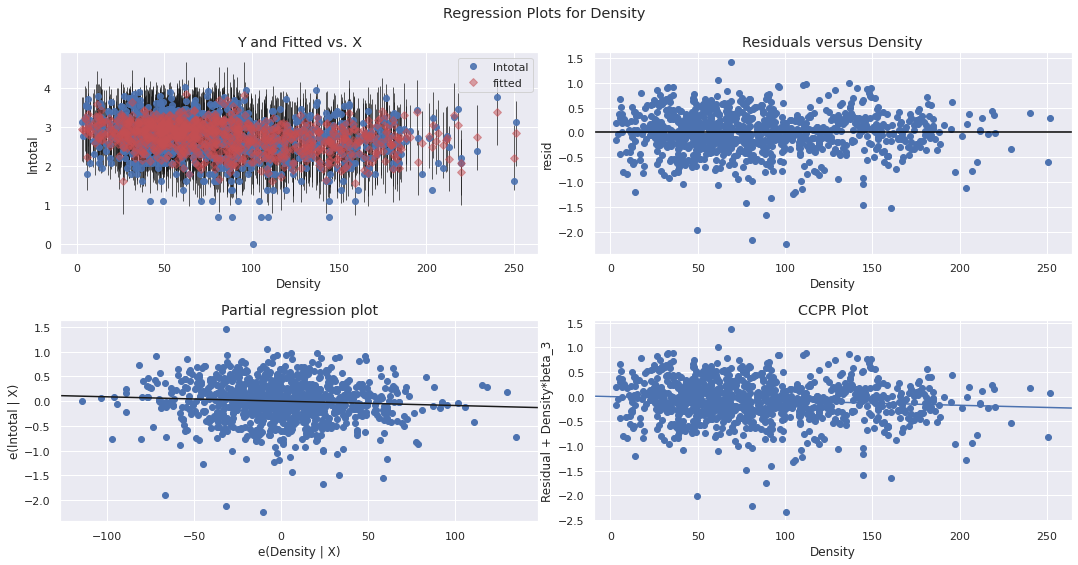

In [34]:
# residual analysis
sns.set()
import warnings # ignore warning
warnings.filterwarnings("ignore")
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(regression,"Density", fig =fig)
plt.savefig(os.path.join('img','3.png'))